In [59]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Pre-processing

In [61]:
# data path
# these data all from COCO https://cocodataset.org/#home
# can be easily downloaded from https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb
# Google Drive used here due to the instability of colab..

annoation_path = "/content/drive/MyDrive/datasets/coco/annotations"
test2014_path = "/content/drive/MyDrive/datasets/coco/test2014"

caption_train2014_path = "/content/drive/MyDrive/datasets/coco/annotations/captions_train2014.json"
train2014_path = "/content/drive/MyDrive/datasets/coco/train2014/train2014"

val2014_path = "/content/drive/MyDrive/datasets/coco/val2014"
test2015_path = "/content/drive/MyDrive/datasets/coco/test2015"


In [62]:
# read the train2014 caption and images

# import packages
from PIL import Image
import os
import json

# read the json file
with open(caption_train2014_path, 'r') as f:
    captions_data = json.load(f)

# 查看 JSON 文件的键
print(captions_data.keys())

# 查看第一个注释信息的示例
print(captions_data['annotations'][0]['image_id'])



dict_keys(['info', 'images', 'licenses', 'annotations'])
318556


In [63]:
# read the questions
question_path = "/content/drive/MyDrive/datasets/coco/v2_OpenEnded_mscoco_train2014_questions.json"
anotation_q_path = "/content/drive/MyDrive/datasets/coco/v2_mscoco_train2014_annotations.json"
# read the json file
with open(question_path, 'r') as f:
    question_data = json.load(f)

with open(anotation_q_path, 'r') as f:
    anotation_data = json.load(f)

question_data.keys(), anotation_data.keys()

(dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions']),
 dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type']))

In [64]:
anotation_data['annotations'][0]

{'question_type': 'what is this',
 'multiple_choice_answer': 'net',
 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 458752,
 'answer_type': 'other',
 'question_id': 458752000}

In [65]:
anotation_data.keys()

dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type'])

In [66]:
# anotation_data['an']

In [67]:
question_data['questions'][0]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [68]:
captions_data['images'][0]

{'license': 5,
 'file_name': 'COCO_train2014_000000057870.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-14 16:28:13',
 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
 'id': 57870}

In [69]:
captions_data['annotations'][0]

{'image_id': 318556,
 'id': 48,
 'caption': 'A very clean and well decorated empty bathroom'}

In [70]:
len(captions_data['annotations']), len(captions_data['images']), len(captions_data['info'])

(414113, 82783, 6)

In [71]:
from tqdm import tqdm
import pandas as pd
image_id_lst = []
id_lst = []
captions_lst = []
for _ in tqdm(captions_data['annotations']):
  id_lst.append(_['id'])
  image_id_lst.append(_['image_id'])
  captions_lst.append(_['caption'])

df = pd.DataFrame({'id': id_lst, 'image_id': image_id_lst, 'captions': captions_lst})
df

100%|██████████| 414113/414113 [00:00<00:00, 833768.15it/s]


,id,image_id,captions
0,48,318556,A very clean and well decorated empty bathroom
1,67,116100,A panoramic view of a kitchen and all of its a...
2,126,318556,A blue and white bathroom with butterfly theme...
3,148,116100,A panoramic photo of a kitchen and dining room
4,173,379340,A graffiti-ed stop sign across the street from...
...,...,...,...
414108,829655,133071,a slice of bread is covered with a sour cream ...
414109,829658,410182,A long plate hold some fries with some sliders...
414110,829665,180285,Two women sit and pose with stuffed animals.
414111,829693,133071,White Plate with a lot of guacamole and an ext...


In [72]:
# read the file names in the train2014_path, fielter by it.
file_names = os.listdir(train2014_path)

# Extract image IDs from file names
image_ids_in_files = [
    int(file_name.split("_")[-1].split(".")[0]) for file_name in file_names
]

# Filter the DataFrame
filtered_df = df[df["image_id"].isin(image_ids_in_files)]
# Print or use the filtered DataFrame
filtered_df

,id,image_id,captions
18,668,285579,"A person, protected from the rain by their umb..."
178,5453,285579,A person walking outside in the rain with a gr...
201,5975,285579,A student walks in the rain with a green umbre...
244,6902,285579,An individual covers himself under an umbrella...
256,7340,285579,A man walking in the rain crossing a street wh...
...,...,...,...
413871,820584,384070,A small tree with lights tangled around it.
414005,826306,211302,A table with three chairs sits in front of a r...
414039,827661,211302,A tan refrigerator with lots of magnets behind...
414045,827754,211302,A fridge covered in magnets sits next to a table.


In [73]:
# for sentence in filtered_df['captions']:
#   if ',' in sentence:
#     if 'and' in sentence:
#       continue
#     else:
#       print(sentence)

In [74]:
# create the graden-path secnetiece.

def gen_garden_path(sentence):

  if ',' in sentence:
    if 'and' in sentence:
      return sentence
    else:
      return sentence.replace(',', '')
  return sentence

def garden_path_ornot(sentence):
  if ',' in sentence:
    if 'and' in sentence:
      return False
    else:
      return True
  return False

filtered_df['garden_captions'] = filtered_df['captions'].apply(gen_garden_path)
filtered_df['garden_captions_tf'] = filtered_df['captions'].apply(garden_path_ornot)
filtered_df

<ipython-input-74-7412f680ae80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['garden_captions'] = filtered_df['captions'].apply(gen_garden_path)
<ipython-input-74-7412f680ae80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['garden_captions_tf'] = filtered_df['captions'].apply(garden_path_ornot)


,id,image_id,captions,garden_captions,garden_captions_tf
18,668,285579,"A person, protected from the rain by their umb...",A person protected from the rain by their umbr...,True
178,5453,285579,A person walking outside in the rain with a gr...,A person walking outside in the rain with a gr...,False
201,5975,285579,A student walks in the rain with a green umbre...,A student walks in the rain with a green umbre...,False
244,6902,285579,An individual covers himself under an umbrella...,An individual covers himself under an umbrella...,False
256,7340,285579,A man walking in the rain crossing a street wh...,A man walking in the rain crossing a street wh...,False
...,...,...,...,...,...
413871,820584,384070,A small tree with lights tangled around it.,A small tree with lights tangled around it.,False
414005,826306,211302,A table with three chairs sits in front of a r...,A table with three chairs sits in front of a r...,False
414039,827661,211302,A tan refrigerator with lots of magnets behind...,A tan refrigerator with lots of magnets behind...,False
414045,827754,211302,A fridge covered in magnets sits next to a table.,A fridge covered in magnets sits next to a table.,False


In [75]:
answer_df = pd.DataFrame(anotation_data['annotations'])
question_df = pd.DataFrame(question_data['questions'])

qa_df = question_df.merge(answer_df.drop(columns=['image_id']), on = 'question_id')

In [76]:
vqa_df_test = filtered_df.merge(qa_df, on = 'image_id')

In [77]:
vqa_df_test

,id,image_id,captions,garden_captions,garden_captions_tf,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,668,285579,"A person, protected from the rain by their umb...",A person protected from the rain by their umbr...,True,What color is the umbrella?,285579000,what color is the,green,"[{'answer': 'green', 'answer_confidence': 'yes...",other
1,668,285579,"A person, protected from the rain by their umb...",A person protected from the rain by their umbr...,True,Is this man walking in the rain?,285579001,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
2,668,285579,"A person, protected from the rain by their umb...",A person protected from the rain by their umbr...,True,Does he have a backpack on?,285579002,none of the above,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
3,5453,285579,A person walking outside in the rain with a gr...,A person walking outside in the rain with a gr...,False,What color is the umbrella?,285579000,what color is the,green,"[{'answer': 'green', 'answer_confidence': 'yes...",other
4,5453,285579,A person walking outside in the rain with a gr...,A person walking outside in the rain with a gr...,False,Is this man walking in the rain?,285579001,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
...,...,...,...,...,...,...,...,...,...,...,...
51417,827754,211302,A fridge covered in magnets sits next to a table.,A fridge covered in magnets sits next to a table.,False,Are those chairs retro?,211302001,are,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
51418,827754,211302,A fridge covered in magnets sits next to a table.,A fridge covered in magnets sits next to a table.,False,Is the refrigerator new?,211302002,is the,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no
51419,828552,211302,a yellow refrigerator some chairs and a table,a yellow refrigerator some chairs and a table,False,What is the design of the table cloth called?,211302000,what is the,plaid,"[{'answer': 'plaid', 'answer_confidence': 'may...",other
51420,828552,211302,a yellow refrigerator some chairs and a table,a yellow refrigerator some chairs and a table,False,Are those chairs retro?,211302001,are,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no


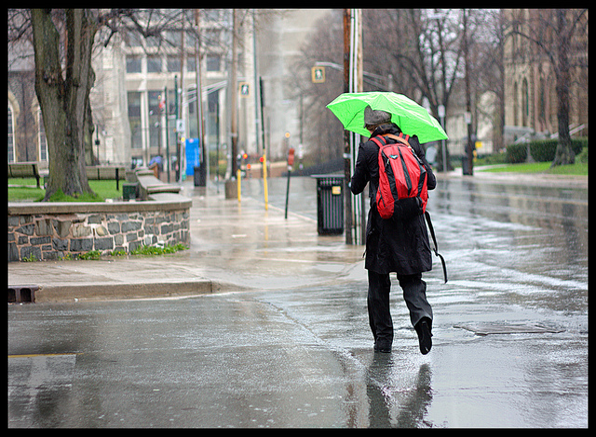

Caption: A person, protected from the rain by their umbrella, walks down the road.
Garden Caption: A person protected from the rain by their umbrella walks down the road.
Garden Caption TF: True
Question: Is this man walking in the rain?
Correct Answer: yes


In [78]:
# Example: Load and display a picture and its description, constructed ambiguity, questions and answers
# case_row = vqa_df_test.loc[0]
for row in vqa_df_test.iterrows():
  case_row = row[1]

  # conditions
  if case_row['garden_captions_tf'] == False:
    continue
  if case_row['question_type'] != 'is this':
    continue

  # parameters
  image_id = case_row['image_id']
  caption = case_row['captions']
  garden_caption = case_row['garden_captions']
  garden_caption_tf = case_row['garden_captions_tf']
  question = case_row['question']
  answer = case_row['multiple_choice_answer']

  # img path
  image_filename = f"{train2014_path}/COCO_train2014_{str(image_id).zfill(12)}.jpg"

  # load img
  image = Image.open(image_filename)
  display(image.resize((596, 437)))

  # print
  print("Caption:", caption)
  print("Garden Caption:", garden_caption)
  print("Garden Caption TF:", garden_caption_tf)
  print("Question:", question)
  print("Correct Answer:", answer)

  break

In [79]:
# Train a model to express whether an image is clearly expressed and whether the language is clearly expressed (is there ambiguity?)
# The dialogue model must have a module to detect ambiguity, there may be cutting-edge progress...

# https://arxiv.org/abs/2304.14399 We're afraid language models aren't modeling ambiguity


# BLIP demo

In [80]:
# BLIP install

# !git clone https://github.com/salesforce/LAVIS.git
# %cd LAVIS
# !pip install -e .

# Install required packages
!pip install transformers
!pip install salesforce-lavis
!pip install torch torchvision
!pip install omegaconf

import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

torch.cuda.is_available()

False

fatal: destination path 'LAVIS' already exists and is not an empty directory.


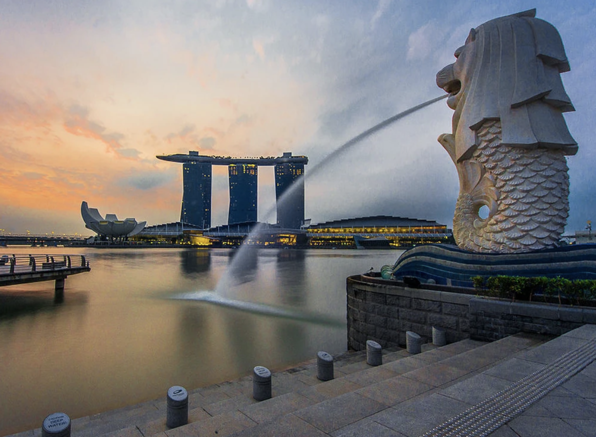

In [81]:
!git clone https://github.com/salesforce/LAVIS.git

raw_image = Image.open("./LAVIS/docs/_static/merlion.png").convert("RGB")
display(raw_image.resize((596, 437)))

In [82]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [83]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/lavis/models/base_model.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

In [84]:
vis_processors.keys()

dict_keys(['train', 'eval'])

In [85]:
txt_processors.keys()

dict_keys(['train', 'eval'])

In [86]:
question = "Which city is this photo taken?"

In [87]:
# use "eval" processors for inference
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)

samples = {"image": image, "text_input": question}

In [88]:
model.predict_answers(samples=samples, inference_method="generate")

['singapore']

In [89]:
# rank answer candidates by their likelihood and return the best answer
answer_candidates = ["Singapore", "London", "Palo Alto", "Tokyo"]

model.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

['Singapore']

In [90]:
batch_size = 3

# create a batch of samples, could be multiple images or copies of the same image
image_batch = image.repeat(batch_size, 1, 1, 1)

# create a batch of questions, make sure the number of questions matches the number of images
question_1 = txt_processors["eval"]("Which city is this photo taken?")
question_2 = txt_processors["eval"]("What time is this during the day?")
question_3 = txt_processors["eval"]("Is it Singapore or London?")

question_batch = [question_1, question_2, question_3]

model.predict_answers(samples={"image": image_batch, "text_input": question_batch}, inference_method="generate")


['singapore', 'sunset', 'singapore']

# Experiment Pipeline Frame

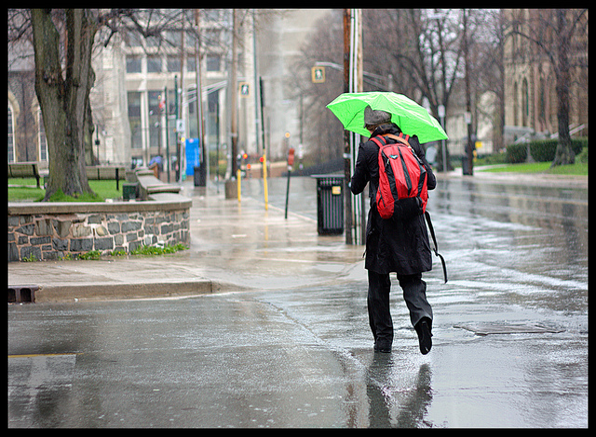

Caption: A person, protected from the rain by their umbrella, walks down the road.
Garden Caption: A person protected from the rain by their umbrella walks down the road.
Garden Caption TF: True
Question: Is this man walking in the rain?
Correct Answer: yes


In [91]:
# Example: Load and display a picture and its description, constructed ambiguity, questions and answers
# case_row = vqa_df_test.loc[0]
for row in vqa_df_test.iterrows():
  case_row = row[1]

  # conditions
  if case_row['garden_captions_tf'] == False:
    continue
  if case_row['question_type'] != 'is this':
    continue

  # parameters
  image_id = case_row['image_id']
  caption = case_row['captions']
  garden_caption = case_row['garden_captions']
  garden_caption_tf = case_row['garden_captions_tf']
  question = case_row['question']
  answer = case_row['multiple_choice_answer']

  # img path
  image_filename = f"{train2014_path}/COCO_train2014_{str(image_id).zfill(12)}.jpg"

  # load img
  image = Image.open(image_filename)
  display(image.resize((596, 437)))

  # print
  print("Caption:", caption)
  print("Garden Caption:", garden_caption)
  print("Garden Caption TF:", garden_caption_tf)
  print("Question:", question)
  print("Correct Answer:", answer)

  break

In [92]:
# use "eval" processors for inference
image_input = vis_processors["eval"](image).unsqueeze(0).to(device)
question_input = txt_processors["eval"](question)

samples = {"image": image_input, "text_input": question_input}

In [93]:
model.predict_answers(samples=samples, inference_method="generate")

['yes']

In [94]:

# Load image onto device
image_input = vis_processors["eval"](image).unsqueeze(0).to(device)
question_input = txt_processors["eval"](question)
blank_image_tensor = torch.zeros((1, 3, 480, 480)).to(device)

# Predict using caption only
samples_caption = {"image": blank_image_tensor, "text_input": caption}
answer_caption = model.predict_answers(samples=samples_caption, inference_method="generate")
print("Answer (Caption Only):", answer_caption)

# Predict using garden caption only
samples_garden_caption = {"image": blank_image_tensor, "text_input": garden_caption}
answer_garden_caption = model.predict_answers(samples=samples_garden_caption, inference_method="generate")
print("Answer (Garden Caption Only):", answer_garden_caption)

# Predict using caption + image
samples_caption_image = {"image": image_input, "text_input": caption}
answer_caption_image = model.predict_answers(samples=samples_caption_image, inference_method="generate")
print("Answer (Caption + Image):", answer_caption_image)

# Predict using garden caption + image
samples_garden_caption_image = {"image": image_input, "text_input": garden_caption}
answer_garden_caption_image = model.predict_answers(samples=samples_garden_caption_image, inference_method="generate")
print("Answer (Garden Caption + Image):", answer_garden_caption_image)


Answer (Caption Only): ['no']
Answer (Garden Caption Only): ['no']
Answer (Caption + Image): ['yes']
Answer (Garden Caption + Image): ['yes']


In [95]:
# # rank answer candidates by their likelihood and return the best answer
# answer_candidates = ["Singapore", "London", "Palo Alto", "Tokyo"]

# model.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

In [96]:
# batch_size = 3

# # create a batch of samples, could be multiple images or copies of the same image
# image_batch = image.repeat(batch_size, 1, 1, 1)

# # create a batch of questions, make sure the number of questions matches the number of images
# question_1 = txt_processors["eval"]("Which city is this photo taken?")
# question_2 = txt_processors["eval"]("What time is this during the day?")
# question_3 = txt_processors["eval"]("Is it Singapore or London?")

# question_batch = [question_1, question_2, question_3]

# model.predict_answers(samples={"image": image_batch, "text_input": question_batch}, inference_method="generate")
